In [1]:
import contextily as cx
import geopandas as gpd
import matplotlib.pyplot as plt
import nivapy3 as nivapy
import pandas as pd
from rasterstats import zonal_stats

plt.style.use("ggplot")

In [2]:
# Connect to the 'general' database as a 'read-only' user
eng = nivapy.da.connect_postgis()

Connection successful.


# Plot locations of all points of interest

## Site locations

In [3]:
# Lat/lon co-ords
xl_path = "../data/subcatchments_metadata/Subcatchments_existing_data_metadata.xlsx"
sheet_name = "Summary_all_points"
df = pd.read_excel(xl_path, sheet_name=sheet_name)
df.head()

,stasjonID,stasjonNavn,Lat,Long,Type,Params
0,4,Caskin-jeaggi / Caskinjohka,68.926158,25.597493,Quantom,Chem
1,13,Ruvvas-jeaggi / Russasjohka,69.106753,25.719740,Quantom,Chem
2,13b,Mareveadji,69.199914,25.689413,Quantom,Sensor
3,3c,Skierrejohka,69.327242,24.010011,Quantom,Sensor
4,12,Šuolggajohka,69.338290,25.098504,Quantom,Chem


In [4]:
# Convert to geodataframe
pt_gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Long, df.Lat), crs="epsg:4326")
pt_gdf.to_crs(epsg=25833, inplace=True)
pt_gdf

,stasjonID,stasjonNavn,Lat,Long,Type,Params,geometry
0,4,Caskin-jeaggi / Caskinjohka,68.926158,25.597493,Quantom,Chem,POINT (923457.578 7682802.457)
1,13,Ruvvas-jeaggi / Russasjohka,69.106753,25.719740,Quantom,Chem,POINT (924787.108 7703526.888)
2,13b,Mareveadji,69.199914,25.689413,Quantom,Sensor,POINT (921787.270 7713568.930)
3,3c,Skierrejohka,69.327242,24.010011,Quantom,Sensor,POINT (853885.290 7716952.400)
4,12,Šuolggajohka,69.338290,25.098504,Quantom,Chem,POINT (896118.365 7724852.808)
5,234-28599,"Anarjohka 2, oppstrøms Cappesjohka",69.352825,25.780663,Vannmiljø,Water chem,POINT (922359.790 7731025.020)
6,14,Cearrogeasjohka,69.389922,24.472635,"NVE, Quantom","Discharge, water temp (NVE), sensors (Quantom)",POINT (870853.570 7726617.270)
7,Anarjohka_M4,Anarjohka,69.398370,25.842220,Quantom,Sensor,POINT (923851.612 7736462.140)
8,234.26.4,Karasjok rør 4,69.400859,25.814402,NVE,"Soil temperature, soil moisture content, groun...",POINT (922724.994 7736543.007)
9,234.24.0,Anarjokka ovf. Karasjokka,69.408237,25.811849,NVE,Groundwater level,POINT (922481.001 7737336.976)


In [5]:
# Get main catchment
fpath = "/home/jovyan/shared/QUANTOM/data/gis/tana_vassdragsomrade.geojson"
vassom_gdf = gpd.read_file(fpath, driver="GeoJSON")

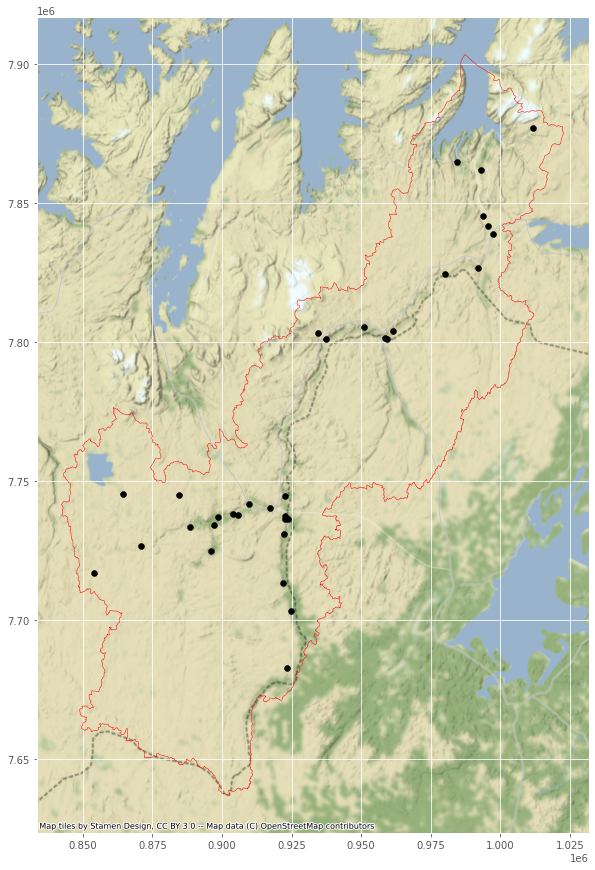

In [6]:
ax = vassom_gdf.plot(figsize=(15, 15), edgecolor="r", facecolor="none")
pt_gdf.plot(ax=ax, color='k')
cx.add_basemap(ax, crs=pt_gdf.crs, source=cx.providers.Stamen.Terrain)

In [7]:
# Save points as a shapefile for plotting in GIS
fpath = r'../data/GIS/shapefiles/tana_all_points.shp'
pt_gdf.to_file(fpath, index='stasjonID')

/tmp/ipykernel_572/1345368970.py:3: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  pt_gdf.to_file(fpath, index='stasjonID')


In [7]:
# Interactive map of point data
nivapy.spatial.quickmap(pt_gdf,
                        lon_col='Long',
                        lat_col='Lat',
                        popup='stasjonNavn',
                        cluster=False,
                        tiles='OpenStreetmap',
                        aerial_imagery=True,
                        kartverket=True,
                        layer_name='stasjonNavn',
                       )

## Derive catchment boundaries

In [14]:
del df['geometry']

In [16]:
gdf = nivapy.spatial.derive_watershed_boundaries(
    df,
    id_col="stasjonID",
    xcol="Long",
    ycol="Lat",
    crs="epsg:4326",
    min_size_km2=10,
    dem_res_m=10,
    buffer_km=None,
    temp_fold=None,
    reproject=False,
)

Connection successful.


Looping over vassdragsområder:   0%|          | 0/1 [00:00<?, ?it/s]

Looping over outlets in vassdragsområder 234:   0%|          | 0/34 [00:00<?, ?it/s]

In [17]:
gdf.head()

,stasjonID,geometry,stasjonNavn,Lat,Long,Type,Params
0,4,"POLYGON ((913740.000 7689880.000, 913750.000 7...",Caskin-jeaggi / Caskinjohka,68.926158,25.597493,Quantom,Chem
1,8,"MULTIPOLYGON (((950910.000 7813670.000, 950910...",Ovddaldasvárri,69.958486,26.862095,Quantom,Chem
2,12,"MULTIPOLYGON (((906510.000 7718710.000, 906520...",Šuolggajohka,69.338290,25.098504,Quantom,Chem
3,13,"MULTIPOLYGON (((922430.000 7705750.000, 922430...",Ruvvas-jeaggi / Russasjohka,69.106753,25.719740,Quantom,Chem
4,14,"POLYGON ((870070.000 7735440.000, 870100.000 7...",Cearrogeasjohka,69.389922,24.472635,"NVE, Quantom","Discharge, water temp (NVE), sensors (Quantom)"


In [18]:
out_shp = r"../data/GIS/shapefiles/raw_catchment_boundaries_model_setup_2022_v1.shp"
gdf.to_file(out_shp)

/opt/conda/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/tmp/ipykernel_123/119919883.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(out_shp)


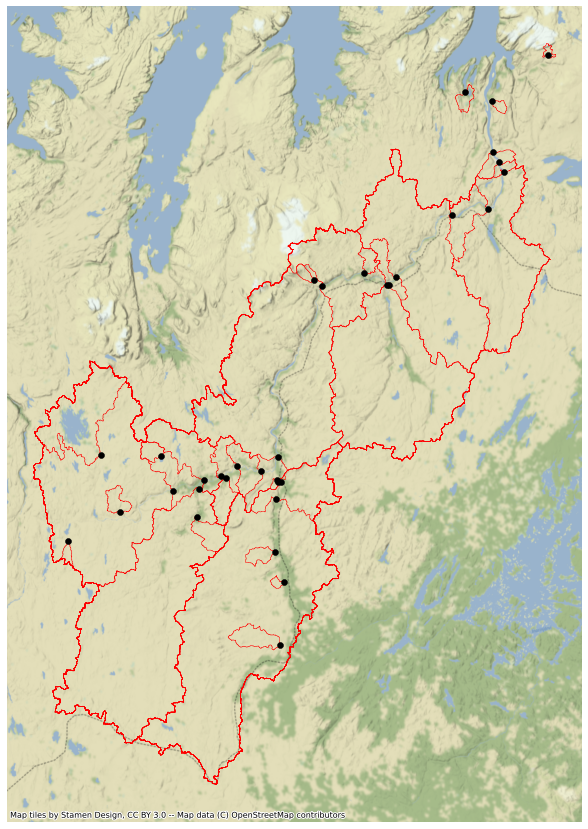

In [19]:
# Plot
ax = gdf.plot(figsize=(15, 15), edgecolor="r", facecolor="none")
pt_gdf.plot(ax=ax, color='k')
cx.add_basemap(ax, crs=gdf.crs, source=cx.providers.Stamen.Terrain)
ax.set_axis_off()
# plt.savefig(r'../output/subcatchment_maps/map_sensor_stations_2022.png', dpi=300)
plt.savefig(r'../output/subcatchment_maps/map_sensor_stations_2022.eps', dpi=300)